# Homework 06 - Jason Li


## 1.

$$Y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

Terms in linear regression:

$y_i$: the outcome, or dependent variable\
$\beta_0$: intercept, or the value of y where the value of x is 0\
$\beta_1$: slope, or the change in y as x changes\
$x_i$: independent variable\
$\epsilon_i$: difference from data point to point on line

In [1]:
from scipy import stats
import pandas as pd

n = 50 # sample size
beta_0 = 50 # y-int
beta_1 = 3.14 # slope

x_min = 0
x_range = 100
x = stats.uniform(x_min, x_range).rvs(n)

stddev = 70
err = stats.norm(loc=0, scale=stddev).rvs(size=n)

Y = beta_0 + beta_1 * x + err

Visualize using scatter plot

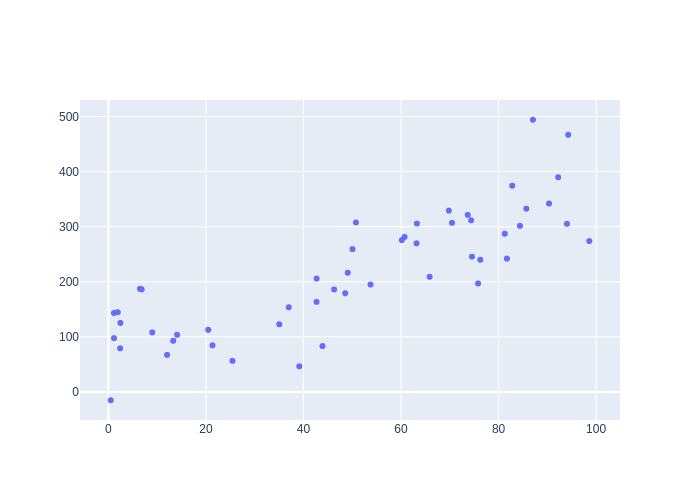

In [2]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))
fig.show(renderer="png")

## 2.

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

df = pd.DataFrame({'x': x, 'Y': Y})

linear_specification = "Y ~ x"
model_data_specification = smf.ols(linear_specification, data=df)
fitted_model = model_data_specification.fit()

In [4]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     104.8
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.16e-13
Time:                        00:18:27   Log-Likelihood:                -277.14
No. Observations:                  50   AIC:                             558.3
Df Residuals:                      48   BIC:                             562.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.6197     16.841      4.134      0.000      35.758     103.481
x              2.9516      0.288     10.239      0.000       2.372       3.531
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.286
Skew:                           0.185   Prob(JB):                        0.867
Kurtosis:                       3.018   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

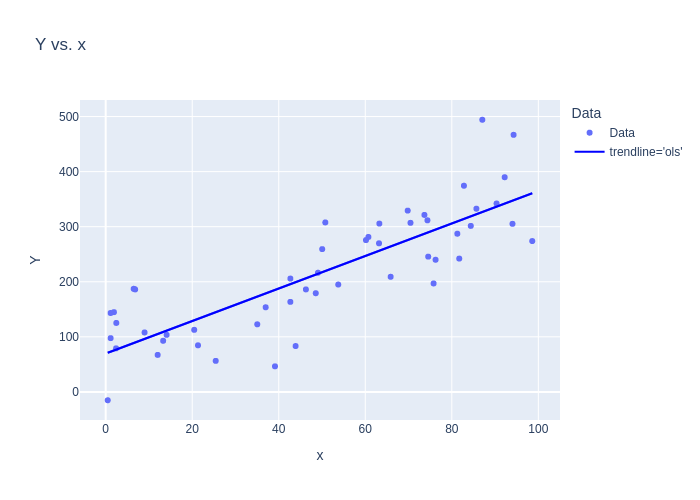

In [5]:
import plotly.express as px

df['Data'] = 'Data'

fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")

## 3.

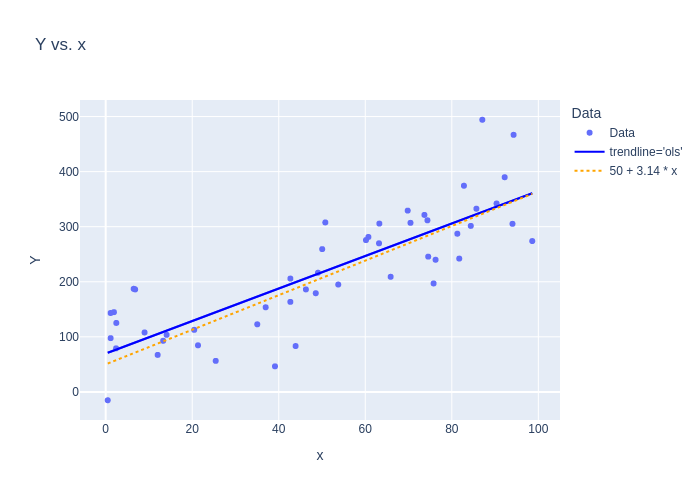

In [6]:
# what does this add onto the figure in constrast to `trendline='ols'`?
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta_0 + beta_1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta_0)+' + '+str(beta_1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")

There are two lines in the scatter plot above.

The orange line is created using $Y_i = \beta_0 + \beta_1 x_i$ ($y=0+1x$) that we set in question 1. Is is the theoretical model of how the line should look, and does not account for any error.

The blue is is the fitted regression line, which is calculated from the actual data $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_i$. They estimate $\beta_0$ and $\beta_1$ values based on the observed sample data, which means that it contains some error. It is calculated from the "ols" (ordinary least squares) method.

## 4.

When fitting a model using `model_data_specification.fit()`, the model estimates the coefficients that minimize the "residual sum of squares".

The residual sum of squares is the (sum of the squared difference of the) difference between *each sample point* (observed value), and the *point on the fitted line* at the same x-value of that sample point.

The `Intercept` below is the predicted $\hat{\beta}_0$ value (y-intercept) and the `x` below is the predicted $\hat{\beta}_1$ value (slope).

In [7]:
fitted_model.params

Intercept    69.619670
x             2.951561
dtype: float64

In [8]:
fitted_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,69.6197,16.841,4.134,0.000,35.758,103.481
x,2.9516,0.288,10.239,0.000,2.372,3.531


In `fitted_model.fittedvalues`, we get the values on the fitted line.\
We originally defined our sample size $n$ to be 50. In this list, we get the value on the fitted line $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_i$ for each $x_i$.

Using the values for $\hat{\beta}_0$ and $\hat{\beta}_1$ from above, we get:

In [9]:
hat_beta_0 = round(fitted_model.params['Intercept'], 2)
hat_beta_1 = round(fitted_model.params['x'], 2)

print("Fitted:")
print(f"y={hat_beta_0} + {hat_beta_1}x")

print("compared to theoretical:")
print(f"y={beta_0} + {beta_1}x")

Fitted:
y=69.62 + 2.95x
compared to theoretical:
y=50 + 3.14x


In [10]:
fitted_model.fittedvalues[:5]
# Only showing first 5 values for space

0    289.648791
1    185.120009
2    248.848776
3    256.088957
4    287.066404
dtype: float64

## 5.

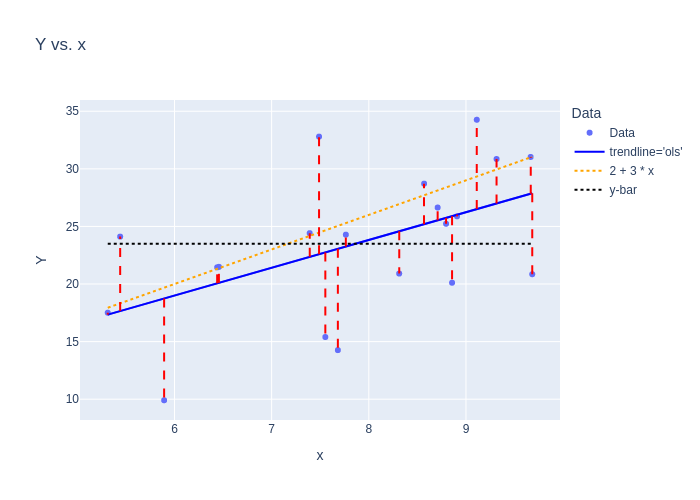

In [11]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'Y': Y})
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['Y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['Y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The line that is chosen wants to minimize the distance from each sample point to the point on the trendline with the same x-value. It is squared because whether the point is above or below the line does not matter.

## 8.

In [12]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        00:18:28   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$H_0$: There is no linear correlation between duration and waiting.

The p-value given is less than $0.001$ (Python rounding to $0.000$), so there is very strong evidence against the null hypothesis.

## 9.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


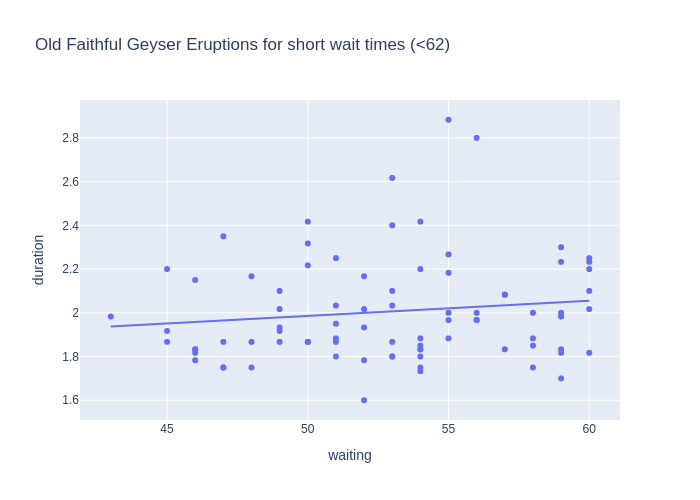

In [13]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The p-value when we limit the wait times to 62 minutes is 0.238. There is no evidence against the null hypothesis. We fail to reject the null hypothesis, and say that there is no correlation between waiting and duration.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


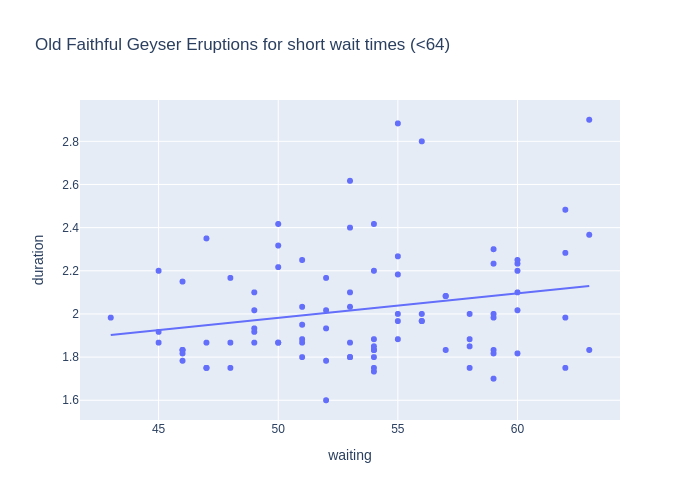

In [14]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The p-value when we limit the wait times to 64 minutes is 0.036. There is moderate evidence against the null hypothesis. We can reject the null hypothesis, and say that there is some correlation between waiting and duration.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


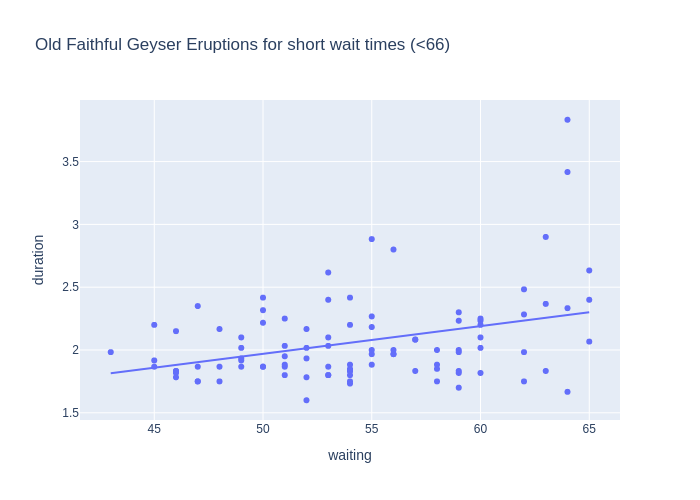

In [15]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The p-value when we limit the wait times to 66 minutes is 0.010. There is strong evidence against the null hypothesis. We can reject the null hypothesis, and say that there is correlation between the waiting and duration.

## 10.

In [16]:
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import plotly.express as px

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


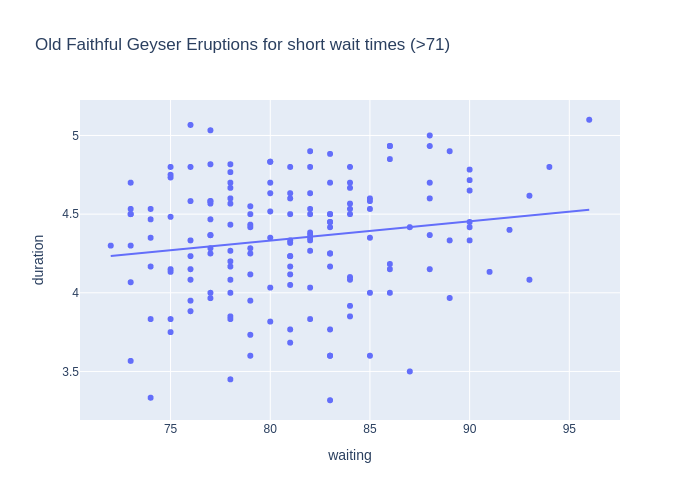

In [17]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 10.1

In [18]:
# Set up parameters for bootstrapping
num_bootstrap_samples = 1000
simulated_slope_coefficients = []

# Bootstrapping loop
for _ in range(num_bootstrap_samples):
    # Resample with replacement
    bootstrap_sample = (old_faithful[long_wait]).sample(frac=1, replace=True)
    
    # Fit a linear regression model to the bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample)
    fitted_model = model.fit()
    
    # Append the slope coefficient to the list
    simulated_slope_coefficients.append(fitted_model.params['waiting'])

# Convert to a numpy array for easier handling
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

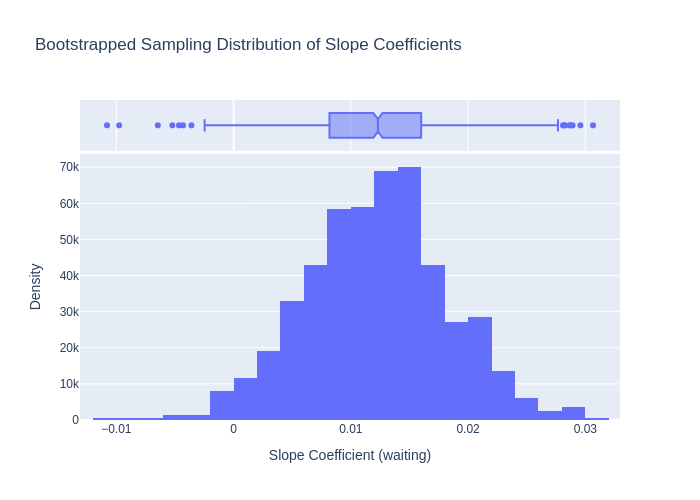

In [19]:
# Create a DataFrame for visualization
slope_df = pd.DataFrame({'Slope Coefficient': simulated_slope_coefficients})

# Plot the bootstrapped sampling distribution with Plotly
fig = px.histogram(
    slope_df,
    x='Slope Coefficient',
    nbins=30,
    title='Bootstrapped Sampling Distribution of Slope Coefficients',
    histnorm='density',
    marginal='box',  # Adds a box plot to show central tendency and variability
)

fig.update_layout(
    xaxis_title='Slope Coefficient (waiting)',
    yaxis_title='Density',
)

fig.show(renderer="png")

### 10.2

In [20]:
from scipy import stats
import pandas as pd

old_faithful_simulation = old_faithful[long_wait].copy()

old_faithful_simulation['duration'] = 1.65 + 0*old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())

In [21]:
old_faithful_simulation

,duration,waiting,kind
0,1.549146,79,long
2,1.309546,74,long
4,1.722176,85,long
6,1.883161,88,long
7,1.986397,85,long
...,...,...,...
263,1.400448,83,long
266,1.389608,75,long
267,1.596535,81,long
269,2.059831,90,long


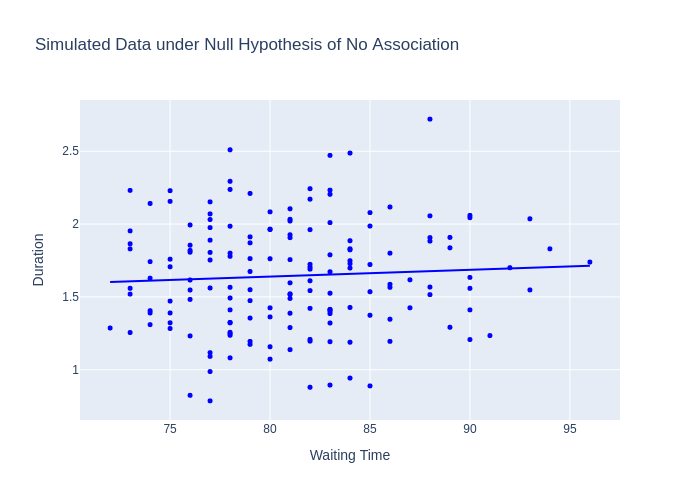

In [22]:
# Create the scatter plot
fig = px.scatter(old_faithful_simulation, x='waiting', y='duration', 
                 title="Simulated Data under Null Hypothesis of No Association",
                 labels={'Waiting Time': 'Waiting Time', 'Duration': 'Duration'},
                 trendline="ols")  # Adds trendline for visual reference

# Customize layout
fig.update_traces(marker=dict(size=5, color='blue'), name="Simulated Data")
fig.update_layout(
    xaxis_title='Waiting Time',
    yaxis_title='Duration',
    showlegend=True
)

fig.show(renderer="png")

### 10.3

In [23]:
ci_lower, ci_upper = np.percentile(simulated_slope_coefficients, (0.025, 0.975))
ci_lower = ci_lower.round(3)
ci_upper = ci_upper.round(3)
(ci_lower, ci_upper)

(-0.011, -0.002)

In [24]:
pvalue = (np.abs(simulated_slope_coefficients) >= smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params['waiting']).mean()

print(f"P-value: {pvalue}")

P-value: 0.505


$0$ is not contained within a 95% bootstrapped confidence interval.

The simulated p-value is 0.505, and the `smf.ols(...)` p-value was 0.038. They do not match.

## 11.

In [25]:
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import plotly.express as px

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

In [26]:
short_wait_limit = 68
short_wait = old_faithful.waiting < short_wait_limit
long_wait = old_faithful.waiting >= short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3519      0.439      5.360      0.000       1.486       3.218
waiting        0.0242      0.005      4.445      0.000       0.013       0.035


In this question, we are using an indicator variable to distinguish between short and long wait times. 

This is now a categorical comparison. Instead of continuous numbers, it is either short or long.

We created $1_{[\text{"long"}]}(k_i)$ which is a binary indicator variable for long wait times. This is 1 if the wait time is long, and 0 if the wait time is short. This models the difference in average duation between long and short wait times, without assuming a linear relationship with waiting time. 

$\beta_{\text{intercept}}$ represents the average duration for short wait times, and $\beta_{\text{contrast}}$ reflects the additional duration (or contrast) for long wait times compared to short. This term represents the difference in the mean value of $Y$ between the long and short wait groups. This is different than what we were doing before. We do not assume a linear relationship (no $\beta_1$ slope).

To test whether there is evidence of a difference between short and long wait times, we can look at the p-value for $\beta_{\text{contrast}}. We can use the code below.

In [27]:
import seaborn as sns
import statsmodels.formula.api as smf

# Load the dataset and create the indicator variable
old_faithful = sns.load_dataset('geyser')
short_wait_limit = 68
old_faithful['wait_category'] = old_faithful['waiting'].apply(lambda x: 'long' if x >= short_wait_limit else 'short')

# Fit the model with the indicator variable
indicator_model = smf.ols('duration ~ C(wait_category)', data=old_faithful)
indicator_results = indicator_model.fit()

# Display the summary to report the p-value for the indicator variable
indicator_results.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.2979,0.031,136.594,0.000,4.236,4.360
C(wait_category)[T.short],-2.2036,0.052,-42.464,0.000,-2.306,-2.101


## Chatbot Transcript & Summary

Transcript: https://chatgpt.com/share/672d5826-40a8-8010-907a-6a4f38babc2b

Summary:

**Summary of Interactions for Indicator Variable Model Assignment**

1. **Setting up the Indicator Variable Model**: We started by categorizing Old Faithful geyser wait times into "short" (less than 68 minutes) and "long" (68 minutes or more) and created a new Simple Linear Regression model that compares these groups using an indicator variable. This indicator, $1_{[\text{"long"}]}(k_i)$, equals 1 for "long" waits and 0 for "short" waits.

2. **Explaining the Indicator Variable and Model Terms**: I explained that an indicator variable is a binary variable (1 or 0) representing different categories—in this case, "long" versus "short" waits. This model uses the indicator variable to directly measure differences in average wait durations between groups without assuming a continuous relationship.

3. **Interpreting $ \beta_{\text{intercept}}$ and $ \beta_{\text{contrast}}$**: We discussed how $ \beta_{\text{intercept}}$ represents the average wait duration for "short" waits, while $ \beta_{\text{contrast}}$ represents the difference in mean wait duration between "long" and "short" groups. This approach, focusing on group means, contrasts with prior models that assumed a continuous, linear trend between wait time and duration.

4. **Comparing Model Specifications**: We compared this indicator variable model with previous models that treated wait times as a continuous predictor. Unlike those continuous models, the indicator model directly compares the two groups, making it simpler to detect differences in mean durations between "short" and "long" wait times.

5. **Testing for Group Differences**: To determine whether there's a significant difference in mean duration between "short" and "long" waits, we looked at the p-value for $ \beta_{\text{contrast}}$. A significant p-value would indicate evidence against the null hypothesis, suggesting that "long" and "short" groups differ in average duration.

6. **Summary**: Our discussion covered the role and interpretation of indicator variables in regression, compared categorical versus continuous modeling approaches, and outlined a strategy for testing group differences in means within a Simple Linear Regression framework.